<a href="https://colab.research.google.com/github/Liekeverhoeven262/Master-Thesis-Data-Science-Society/blob/main/Final_Thesis_clustering_correct_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Construct the path to the file in your Google Drive
personal_data_path = '/content/drive/My Drive/Master Thesis/Data/Final time point 1 personal.xlsx'

# Load the dataset
personal_data_df = pd.read_excel(personal_data_path)

In [3]:
print(personal_data_df.columns)

Index(['ID', 'Time_point', 'Gender', 'Location', 'Condition', 'ERQ_sum',
       'ERQ_CR', 'ERQ_ES', 'SSAS_sum', 'ASI_sum', 'MAIA_sum',
       'MAIA_noticing_mean', 'MAIA_notdistr_mean', 'MAIA_notworry_mean',
       'MAIA_attregul_mean', 'MAIA_emoaware_mean', 'MAIA_selfregu_mean',
       'MAIA_bodylist_mean', 'MAIA_trust_mean', 'MAIA_noticing_sum',
       'MAIA_notdistr_sum', 'MAIA_notworry_sum', 'MAIA_attregul_sum',
       'MAIA_emoaware_sum', 'MAIA_selfregu_sum', 'MAIA_bodylist_sum',
       'MAIA_trust_sum'],
      dtype='object')


In [4]:
ERQ_columns = ['ERQ_CR','ERQ_ES']  # For Emotion Regulation Questionnaire
SAS_columns = ['SSAS_sum']  # For Somatosensory Amplification Scale
MAIA_columns = ['MAIA_noticing_sum', 'MAIA_notdistr_sum', 'MAIA_notworry_sum', 'MAIA_attregul_sum', 'MAIA_emoaware_sum', 'MAIA_selfregu_sum', 'MAIA_bodylist_sum', 'MAIA_trust_sum']  # For Multidimensional Assessment of Interoceptive Awareness
ASI_columns = ['ASI_sum']  # For Anxiety Sensitivity Index

In [7]:
# Combine all questionnaire columns
questionnaire_columns = ERQ_columns + SAS_columns + MAIA_columns + ASI_columns

# Select questionnaire data
questionnaire_data = personal_data_df[questionnaire_columns]

In [8]:
# Select questionnaire data
questionnaire_data = personal_data_df[questionnaire_columns]

#Standardize the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
questionnaire_scaled = scaler.fit_transform(questionnaire_data)

# Convert back to DataFrame (optional, for convenience)
questionnaire_scaled_df = pd.DataFrame(questionnaire_scaled, columns=questionnaire_columns, index=questionnaire_data.index)

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

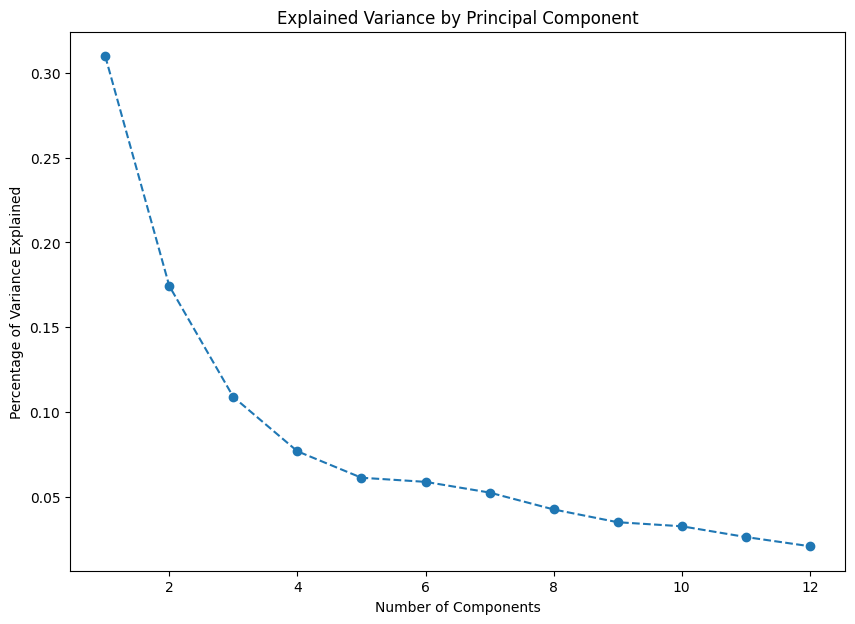

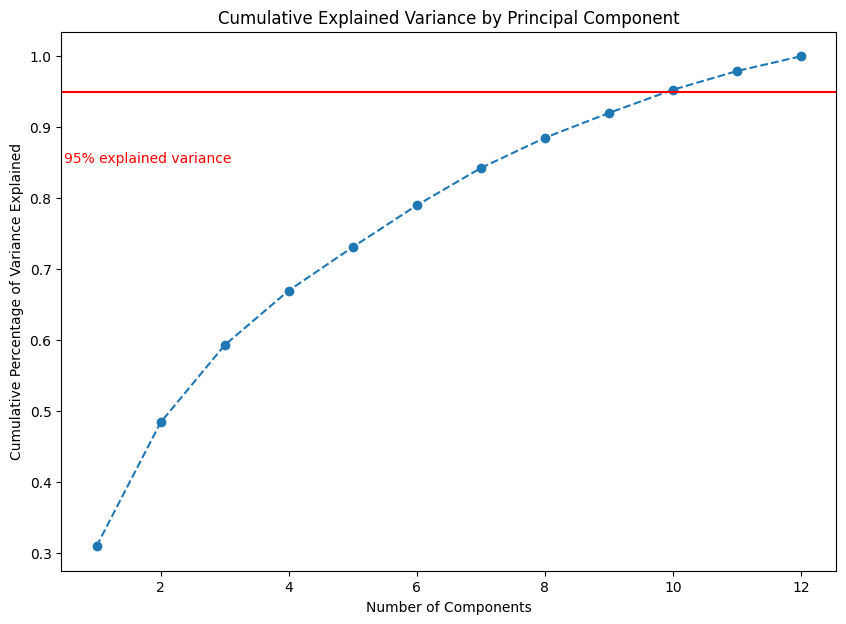

In [10]:
# Perform PCA
pca = PCA()
pca.fit(questionnaire_scaled_df)

# Plot the explained variance by each component
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')
plt.show()

# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='-')  # Line for 95% explained variance
plt.text(0.5, 0.85, '95% explained variance', color = 'red')
plt.show()

In [11]:
import numpy as np

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(n_components)

10


In [12]:
from sklearn.decomposition import PCA

# Number of components to retain
n_components = 10

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(questionnaire_scaled_df)

# Now X_pca contains the transformed features you can use for further analysis or model training

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

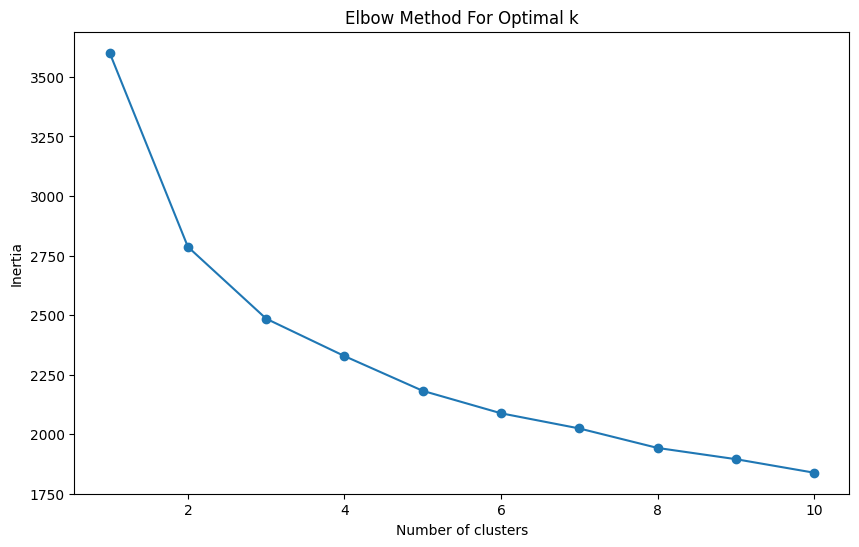

In [13]:
from sklearn.cluster import KMeans

# Determine the number of clusters using the Elbow method
inertia = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia to see the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Attach the cluster labels to your dataframe
questionnaire_scaled_df['Cluster'] = kmeans.labels_

# Now you can inspect the cluster distribution
print(questionnaire_scaled_df['Cluster'].value_counts())

Cluster
0    120
1    116
2     79
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
print(questionnaire_scaled_df.head())

     ERQ_CR    ERQ_ES  SSAS_sum  MAIA_noticing_sum  MAIA_notdistr_sum  \
0 -0.591093  0.248794  0.620306           0.135152           2.407450   
1  0.477965 -1.688926 -0.750897          -0.524893           0.505242   
2 -0.947446  0.248794 -0.922297           0.135152          -0.445861   
3  1.190671 -0.181811  0.277505           0.795197           2.090415   
4  1.190671  1.540607 -0.236696          -0.194870           2.090415   

   MAIA_notworry_sum  MAIA_attregul_sum  MAIA_emoaware_sum  MAIA_selfregu_sum  \
0          -0.920426          -1.623183          -0.528458          -0.277865   
1          -0.094403          -0.300034          -0.528458           0.288656   
2          -2.847815          -0.678077          -1.806985           0.288656   
3           1.282303           1.401158           0.494364           0.855178   
4           0.180939           1.212137          -0.017047           0.288656   

   MAIA_bodylist_sum  MAIA_trust_sum   ASI_sum  Cluster  
0          -0.37

In [16]:
# Calculate means and count for each feature within each cluster
cluster_summary = questionnaire_scaled_df.groupby('Cluster').agg({**{col: ['mean', 'count'] for col in questionnaire_columns}})

# Flatten MultiIndex columns
cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns.values]

# Reset index to make 'Cluster' a column
cluster_summary = cluster_summary.reset_index()

# Display the resulting DataFrame
print(cluster_summary)

   Cluster  ERQ_CR_mean  ERQ_CR_count  ERQ_ES_mean  ERQ_ES_count  \
0        0     0.418573           120    -0.235636           120   
1        1    -0.409845           116     0.206104           116   
2        2    -0.034010            79     0.055294            79   

   SSAS_sum_mean  SSAS_sum_count  MAIA_noticing_sum_mean  \
0      -0.288116             120                0.602684   
1      -0.294322             116               -0.906125   
2       0.869813              79                0.415044   

   MAIA_noticing_sum_count  MAIA_notdistr_sum_mean  ...  \
0                      120                0.053468  ...   
1                      116               -0.076899  ...   
2                       79                0.031697  ...   

   MAIA_emoaware_sum_mean  MAIA_emoaware_sum_count  MAIA_selfregu_sum_mean  \
0                0.421914                      120                0.730071   
1               -0.856907                      116               -0.797991   
2              

In [17]:
# Add the cluster labels to the original dataframe
personal_data_df['Cluster'] = questionnaire_scaled_df['Cluster']

# Now 'personal_data_df' has the original data along with the cluster labels.
# You can inspect the dataframe to ensure the 'Cluster' column is added correctly
print(personal_data_df[['ID','Gender','Location','Condition', 'Cluster']].head())

   ID  Gender  Location  Condition  Cluster
0   5       2         0          1        2
1   6       1         0          2        1
2   7       2         0          2        1
3   8       1         0          1        0
4   9       1         0          1        0


In [18]:
personal_data_compact = personal_data_df[['ID', 'Gender', 'Location', 'Condition', 'Cluster']].copy()

# Print de eerste paar regels van de nieuwe DataFrame om te verifiëren
print(personal_data_compact.head())

   ID  Gender  Location  Condition  Cluster
0   5       2         0          1        2
1   6       1         0          2        1
2   7       2         0          2        1
3   8       1         0          1        0
4   9       1         0          1        0


In [19]:
file_path = "FINAL_personal_data_compact3.xlsx"
personal_data_compact.to_excel(file_path)

from google.colab import files
files.download("FINAL_personal_data_compact3.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Attach the cluster labels to your dataframe
questionnaire_scaled_df['Cluster'] = kmeans.labels_

# Calculate means for each feature within each cluster
cluster_summary = questionnaire_scaled_df.groupby('Cluster').mean()

# Display the resulting DataFrame
print(cluster_summary)

# Summary of the clusters' characteristics
for cluster_id in cluster_summary.index:
    print(f"\nCluster {cluster_id} characteristics:")
    for feature in cluster_summary.columns:
        print(f"{feature}: {cluster_summary.loc[cluster_id, feature]:.2f}")

           ERQ_CR    ERQ_ES  SSAS_sum  MAIA_noticing_sum  MAIA_notdistr_sum  \
Cluster                                                                       
0        0.418573 -0.235636 -0.288116           0.602684           0.053468   
1       -0.409845  0.206104 -0.294322          -0.906125          -0.076899   
2       -0.034010  0.055294  0.869813           0.415044           0.031697   

         MAIA_notworry_sum  MAIA_attregul_sum  MAIA_emoaware_sum  \
Cluster                                                            
0                 0.405801           0.774237           0.421914   
1                 0.135840          -0.798659          -0.856907   
2                -0.815866          -0.003342           0.617361   

         MAIA_selfregu_sum  MAIA_bodylist_sum  MAIA_trust_sum   ASI_sum  
Cluster                                                                  
0                 0.730071           0.554939        0.663631 -0.409928  
1                -0.797991          -0.86